# Predicting Heart Disease Susceptibility

## Introduction




2017 data from the Canadian Chronic Disease Surveillance System reports that around 2.6 million Canadian adults live with diagnosed heart disease.Heart disease is prevelant and urgent medical issue that needs the utmost medical care. Heart disease can go unnoticed until a person experiences a heart attack, heart failure, or an arrhythmia. Understanding the severity of heart disease and the impact has on our population, we would like to explore the following patient dataset to see if there are any variables that can help us predict a diagnosis of heart disease, so the public can put preventative measures in place to lower their risk of heart disease.


<p float="left">
 
  <img src= "https://www.thomsonmedical.com/wp-content/uploads/2019/02/11-Signs-and-Symptoms-of-Heart-Diseases-You-Shouldnt-Ignore.jpg" width = "350" />
  <img src= "https://domf5oio6qrcr.cloudfront.net/medialibrary/5042/n0318g16207256840245.jpg" width = "280"/>
  <img src = "https://cdn1.sph.harvard.edu/wp-content/uploads/sites/30/2016/04/CVD_NSHomepageWidget.jpg" width = "290" />
</p>

*image sources:*
- https://www.health.harvard.edu/heart-health/a-closer-look-at-heart-disease-risk*
- https://www.hsph.harvard.edu/nutritionsource/disease-prevention/cardiovascular-disease/
- https://www.thomsonmedical.com/article/11-signs-and-symptoms-of-heart-diseases-you-shouldnt-ignore/

For these reasons, our group poses this question: **"Can pre-exisiting patient chart data be used to pre-diagnose patients with heart disease using a classification model?"** To answer this question, we are using a Heart Disease Dataset from the UC Irvine Machine Learning Repository. (Original Dataset: https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

The dataset contains patient data provided by physicians from cardiovascular clinics around the world. Processed data donated on July 1st, 1998 contains 14 different variables concerning patient information and factors that affect heart disease. Our project will focus on the data from Cleveland, USA and we will use the following predictor variables:
 
    
  - `age`
  - `sex`: (1= male; 0= female) 
  - `trestbps`: Resting Blood Pressure (mm Hg)
  - `chol`: Serum Cholestrol (mg/dL)
  - `fbs`: Fasting Blood Sugar > 120 mg/dL (1 = true; 0 = false)
  - `restecg`: Resting Electrocardiographic Results (0 = normal, 1 = ST-T wave abnormality, 3 = probable/definite left ventricular hypertrophy)  
  - `thalach`: Maximum Heart Rate Achieved   
  - `exang`: Exercise Induced Angina (1 = yes; 0 = no)
  - `oldpeak`: ST depression Induced by Exercise Relative to Rest  
  - `ca`: Number of Major Vessels (0-3)
  - `cp`: Chest Pain Type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)
  - `slope`: Slope of the Peak Exercise ST Segment (1 = upsloping, 2 = flat, 3 = downsloping)  
  - `thal`: (3 = normal, 6 = fixed defect, 7 = reversible defect) 



    - **Target Variable**:
        - `heart_disease`: Heart Disease Diagnosis (present = 1, 2, 3, 4 ; absent =  0)



## Method Overview:


Our project question asks us to identify whether we can use patient chart data to predict whether a patient is likely to have heart disease. We created a general project workflow below to provide a simple, visual overview of what steps need to be completed for this project (refer to image below). 

1) Preliminary Exploratory Data Analysis: Read the data & wrangle it so the dataset is ready to use for further analyse (no missing values, different predictor types, etc. )  
2) Splitting Data: Split the filtered dataset, into a test and train set Summarize the distribution of each categorical predictor variables for the training data. 
3) Select Predictor Variables: Check for the relationship between each variable and the diagnosis of heart disease as a class. Use the variables with a positive relationship as predictor variables and eliminate the variables with no correlation (if undistributed or have no relation in the graphs created). 
4) Build Classification Model: Use the  K -nearest neighbors classification algorithm to determine the best K value. Once best value is found, run the model with the test set to confirm prediction.  
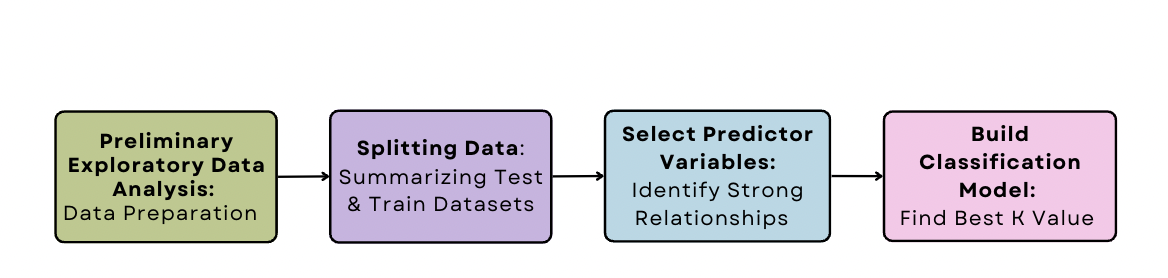



## 1. Preliminary Exploratory Data Analysis

**Loading R libraries**

In [7]:
### Run the R libraries 
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
library(GGally)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 rows
options(repr.plot.width=10, repr.plot.height=10)

**Reading Data from an Online Source into R**

Before beginning any data analysis, we must first download in the heart disease data from the website and read it as a csv file in juypter. After reading the data in, we have 303 recorded observations.

In [8]:
cleveland_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", col_names = FALSE)       
colnames(cleveland_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca","thal", "heart_disease")

cleveland_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


**Filtering Missing Values** 

 Since there are some missing values in the ca and thal columns (?), we must filter them to ensure the data is consistent through the columns. After filtering for missing values, we are given 297 observations that can be used for further data analysis.

In [9]:
filtered_data <- cleveland_data |>
    filter(ca != "?", thal != "?")|>
    drop_na()

filtered_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Mutating Data**

For our target variable (column `heart_disease`), the numerical value 1, 2, 3 and 4 all indicate the presence of heart disease in a patient. Since all four values hold the same meaning to us, we will combine them into a single variable, then mutate the type from numerical to factor where 1 signifies a presence of heart disease and 0 indicates no past or present heart disease history for the patient.

In [10]:
mutate_data <- filtered_data |>
    mutate(heart_disease = ifelse(heart_disease == 0, 0, 1)) |>
    mutate(heart_disease = as_factor(heart_disease))

mutate_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,1
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,1
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


**Changing the column data type**

Since missing values have been filtered out, the `ca` and `thal` columns can be changed from character type to numeric type to match the rest of the variable types in the dataset.

In [11]:
final_data <- mutate_data |>
mutate(ca = as.numeric(ca), thal = as.numeric(thal))

final_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heart_disease
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


## 2. Splitting Data

**Splitting the data into training and testing data**

The first data analysis step provided us with 297 observations that can be further used for analysis. Our next step is to split the data into a training and test set. We have set the proportion to 0.75, meaning that 75 % of our 297 observations will be used towards the training set and the leftover observations will be stored in a test set. We also set our seed to 978 to randomize results and make sure there is no cherrypicking on bias in our data.  

In [12]:
set.seed(978)
heart_split <- initial_split(final_data, prop = 0.75, strata = heart_disease)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

**Summarizing the training data**

We will beging summarizing all the different categorical predictor variables in their own seperate tables to see the distribution of each predictor variable. The following tables display the observation counts for each predictor. variable we are considering. **Refer to introduction for information regarding the numerical value.**

In [13]:
count_sex <- heart_train|>
    group_by(sex)|>
    summarize(sex_count = n())

count_sex

sex,sex_count
<dbl>,<int>
0,68
1,154


In [14]:
count_fbs <- heart_train|>
    group_by(fbs)|>
    summarize(fbs_count = n())
count_fbs

fbs,fbs_count
<dbl>,<int>
0,188
1,34


In [15]:
count_restecg <- heart_train|>
    group_by(restecg)|>
    summarize(restecg_count = n())
count_restecg

restecg,restecg_count
<dbl>,<int>
0,104
1,1
2,117


In [16]:
count_exang <- heart_train|>
    group_by(exang)|>
    summarize(exang_count = n())
count_exang

exang,exang_count
<dbl>,<int>
0,154
1,68


In [17]:
count_slope <- heart_train|>
    group_by(slope)|>
    summarize(slope_count = n())
count_slope

slope,slope_count
<dbl>,<int>
1,99
2,109
3,14


In [18]:
count_ca <- heart_train|>
    group_by(ca)|>
    summarize(ca_count = n())
count_ca

ca,ca_count
<dbl>,<int>
0,135
1,46
2,29
3,12


In [19]:
count_thal <- heart_train|>
    group_by(thal)|>
    summarize(thal_count = n())
count_thal

thal,thal_count
<dbl>,<int>
3,120
6,15
7,87


In [20]:
count_cp <- heart_train|>
    group_by(cp)|>
    summarize(cp_count = n())
count_cp

cp,cp_count
<dbl>,<int>
1,22
2,39
3,56
4,105


**Example Visualizations**

Below, are two example variations using the cp and thal predictors. this visualization allows us to see the categorical predictor variables are not evenly distributed in the data set. The variables that are very undistributed should be removed since they will not be the best predictors out of the 8 possible predictors. These example visualizations aid in helpign us identify possible relationships between the variables and heart disease.

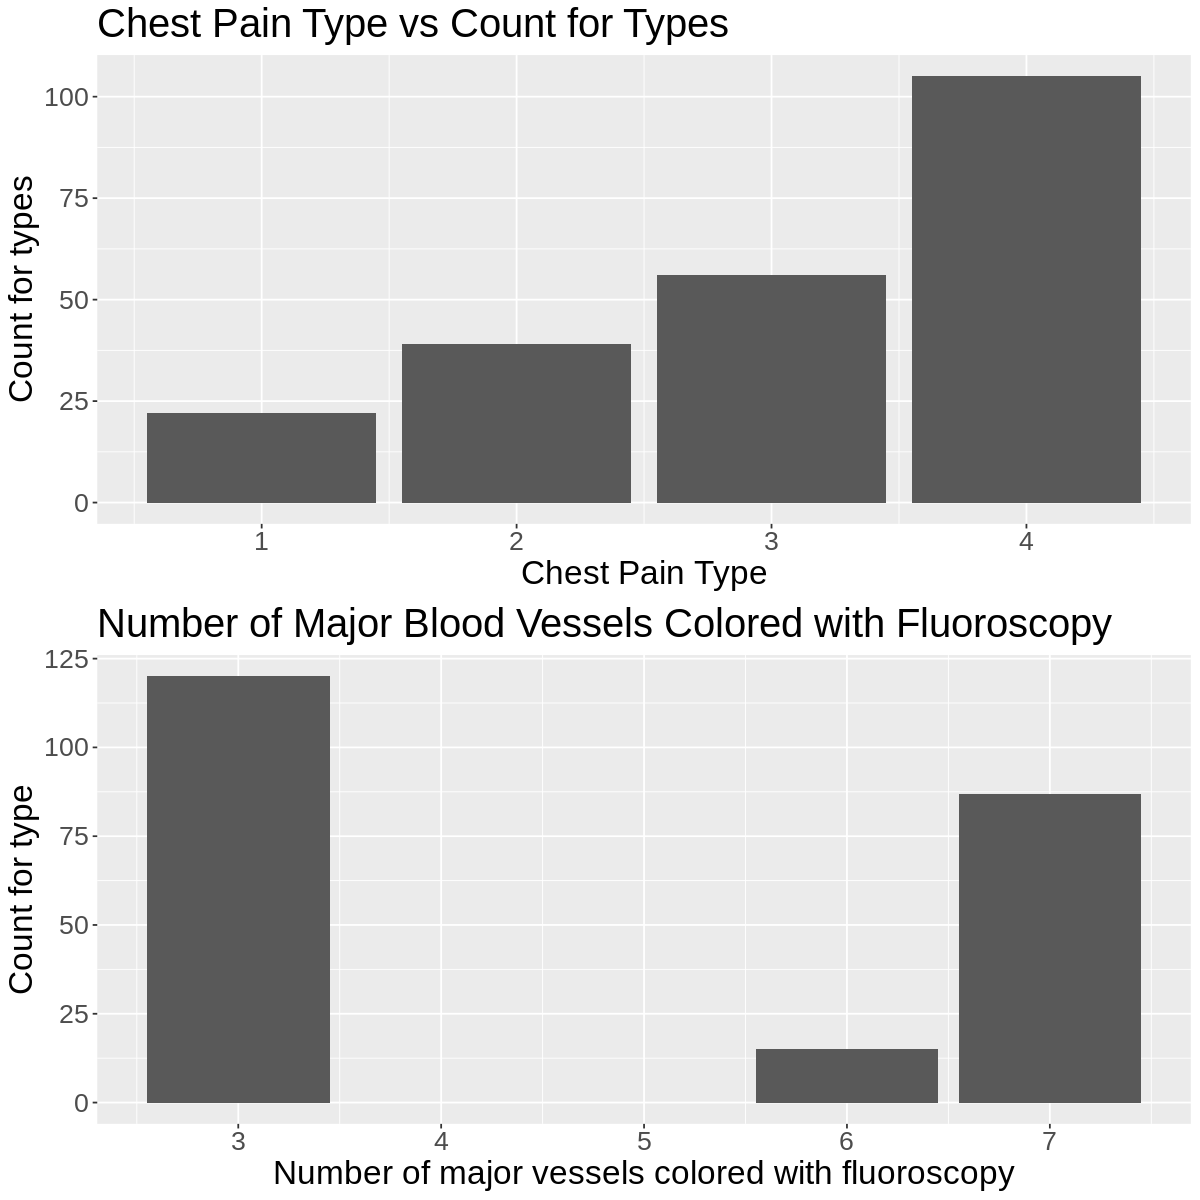

In [21]:
type_vs_cp <- count_cp |>
    ggplot(aes(x = cp, y = cp_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Chest Pain Type",y = "Count for types", fill = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Chest Pain Type vs Count for Types")

type_vs_thal <- count_thal |>
    ggplot(aes(x = thal, y = thal_count)) +
    geom_bar(stat = "identity") +
    labs(x = "Number of major vessels colored with fluoroscopy",y = "Count for type", fill = "Heart Disease") +
    theme(text = element_text(size = 20)) +
    ggtitle("Number of Major Blood Vessels Colored with Fluoroscopy")

plot_grid(type_vs_cp, type_vs_thal, ncol = 1)


**Mean of the numerical predictor values**

The table below shows the mean values of each predictor variable for all patient data.

In [22]:
mean_data <- heart_train|>
    select(age,trestbps,chol,thalach,oldpeak)|>
    summarize(across(age:oldpeak, mean, na.rm = TRUE))
mean_data

age,trestbps,chol,thalach,oldpeak
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.43694,131.7387,247.5811,149.7613,1.018468


**Overlaying the distribution of numerical predictor variables**

Below is a plot that displays the distribution of the variables predictors. This distribution allows us to quanitfy our observations visually and determine which factors may hold more impact. *The plot is done in two graphs to avoid scaling issues*

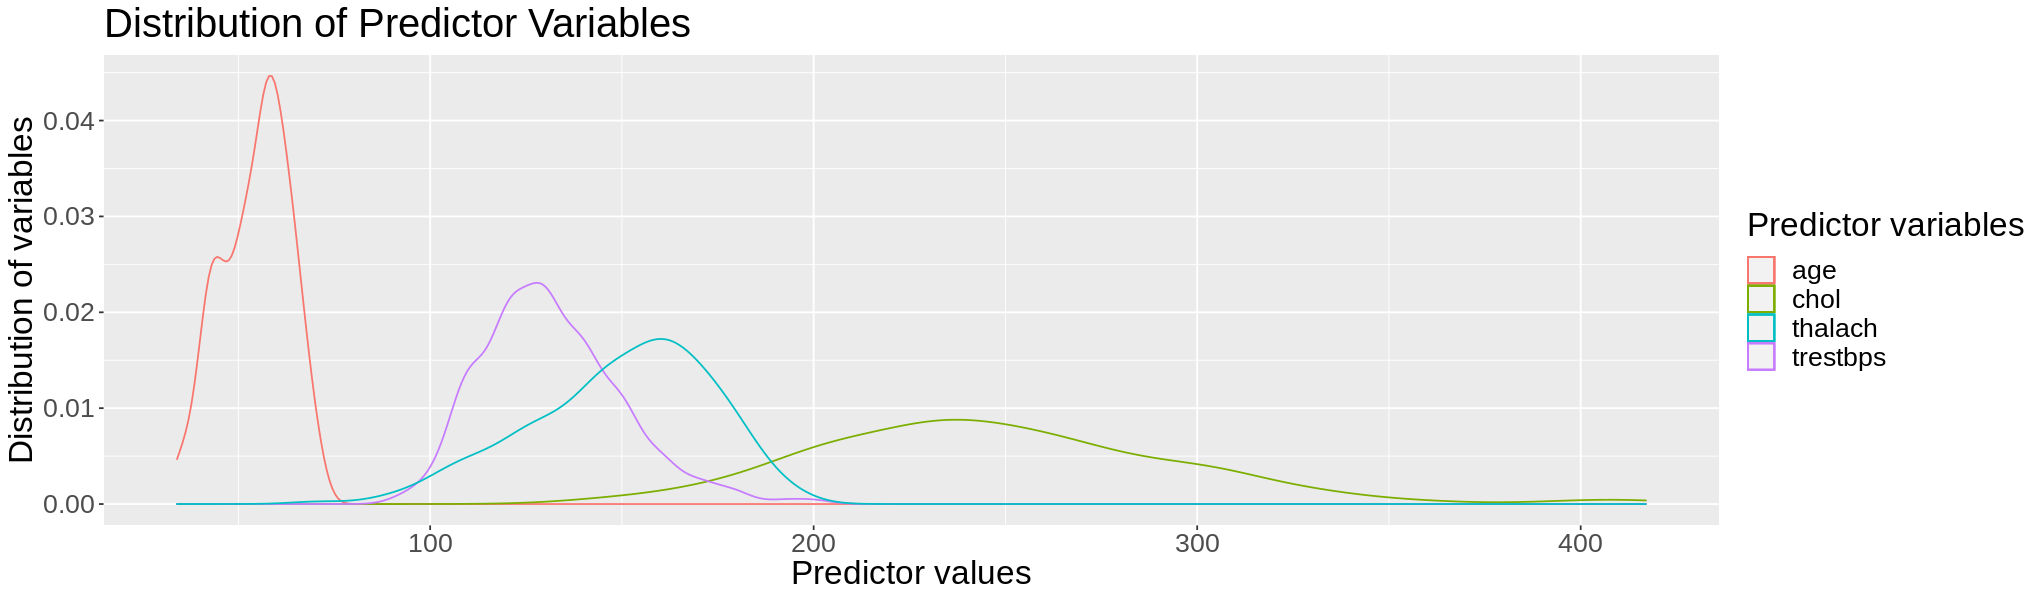

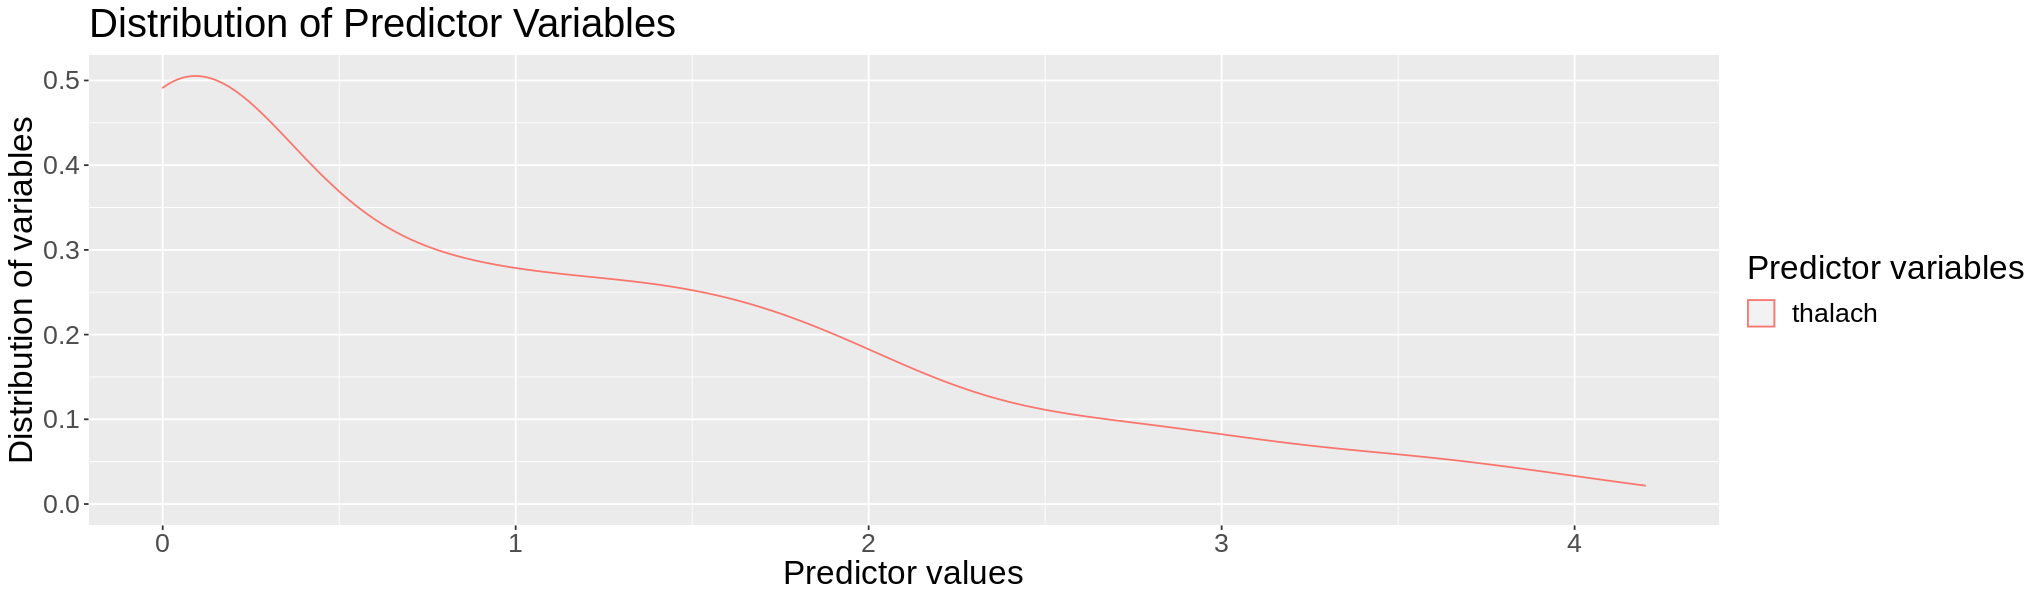

In [23]:
options(repr.plot.width=17, repr.plot.height=5)
dis_plot <- heart_train|>
    ggplot() + 
    geom_density(aes(x=age, color = 'age')) +
    geom_density(aes(x=chol, color = 'chol')) +
    geom_density(aes(x=trestbps, color = 'trestbps')) +
    geom_density(aes(x=thalach, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Predictor Variables")
dis_plot


dis_plot_2 <- heart_train|>
    ggplot() + 
    geom_density(aes(x=oldpeak, color = 'thalach'))+
    labs(x = "Predictor values", y = "Distribution of variables", color = "Predictor variables") +
    scale_fill_discrete(name = "Chest Pain Type", labels = c("Typical Angina", "Atypical Angina", "Non-Anginal Pain", "Asymptomatic")) +
    theme(text = element_text(size = 20)) +
    ggtitle("Distribution of Predictor Variables")
dis_plot_2




**Discover the distribution of heart disease**

Similar to what was done with the predictor variables above, we will observe the count of observations for our target variable, heart disease. The results show. that no heart disease (0) is more common in the patient data than heart disease (1). 

In [24]:
counting_types <- heart_train |>
    group_by(heart_disease)|>
    summarize(types_count = n()) 
counting_types

heart_disease,types_count
<fct>,<int>
0,120
1,102


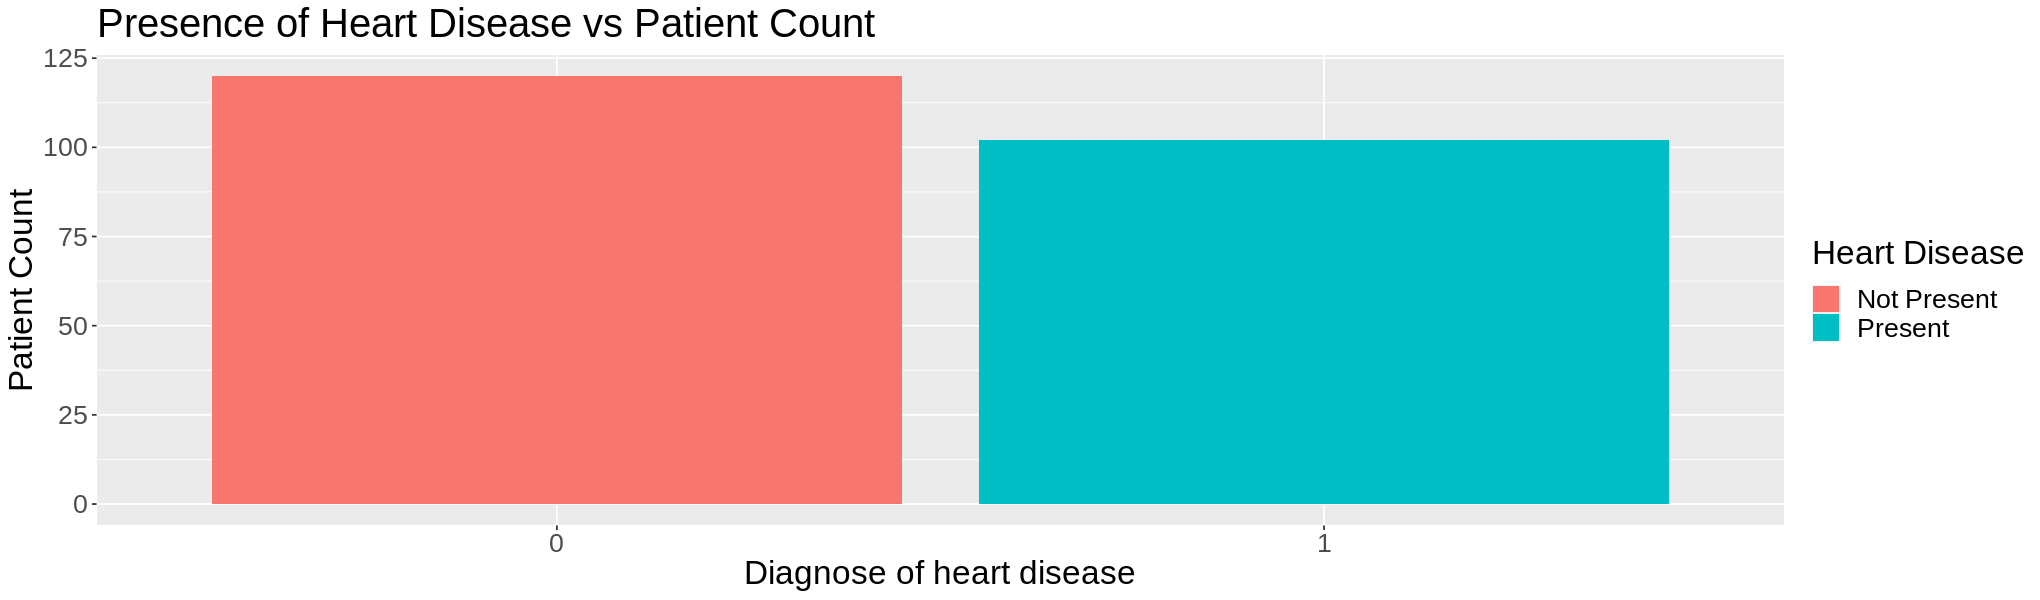

In [25]:
type_vs_heart_disease <- counting_types |>
    ggplot(aes(x = heart_disease, y = types_count, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "Diagnose of heart disease",y = "Patient Count", color = "Heart Disease") +
    ggtitle("Presence of Heart Disease vs Patient Count") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Not Present", "Present")) +
    theme(text = element_text(size = 20))
type_vs_heart_disease

**Analysis:** The graph above shows that the distribution of heart disease is roughly even and scaling is not necessary.

## 3. Select Predictor Variables

**Exploring the relationship between predictor variables using ggpairs()**

Below we use the ggpairs() function from the GGally package to build a scatterplot matrix. This helps us visualize the relationships between different predictor variables and our target variable (heart disease). With this we are able to efficiently visualize a large quantity of data, and only choose relevant relationships to explore further.

*Continous Predictor Variables vs Categorical Target Variable:*

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



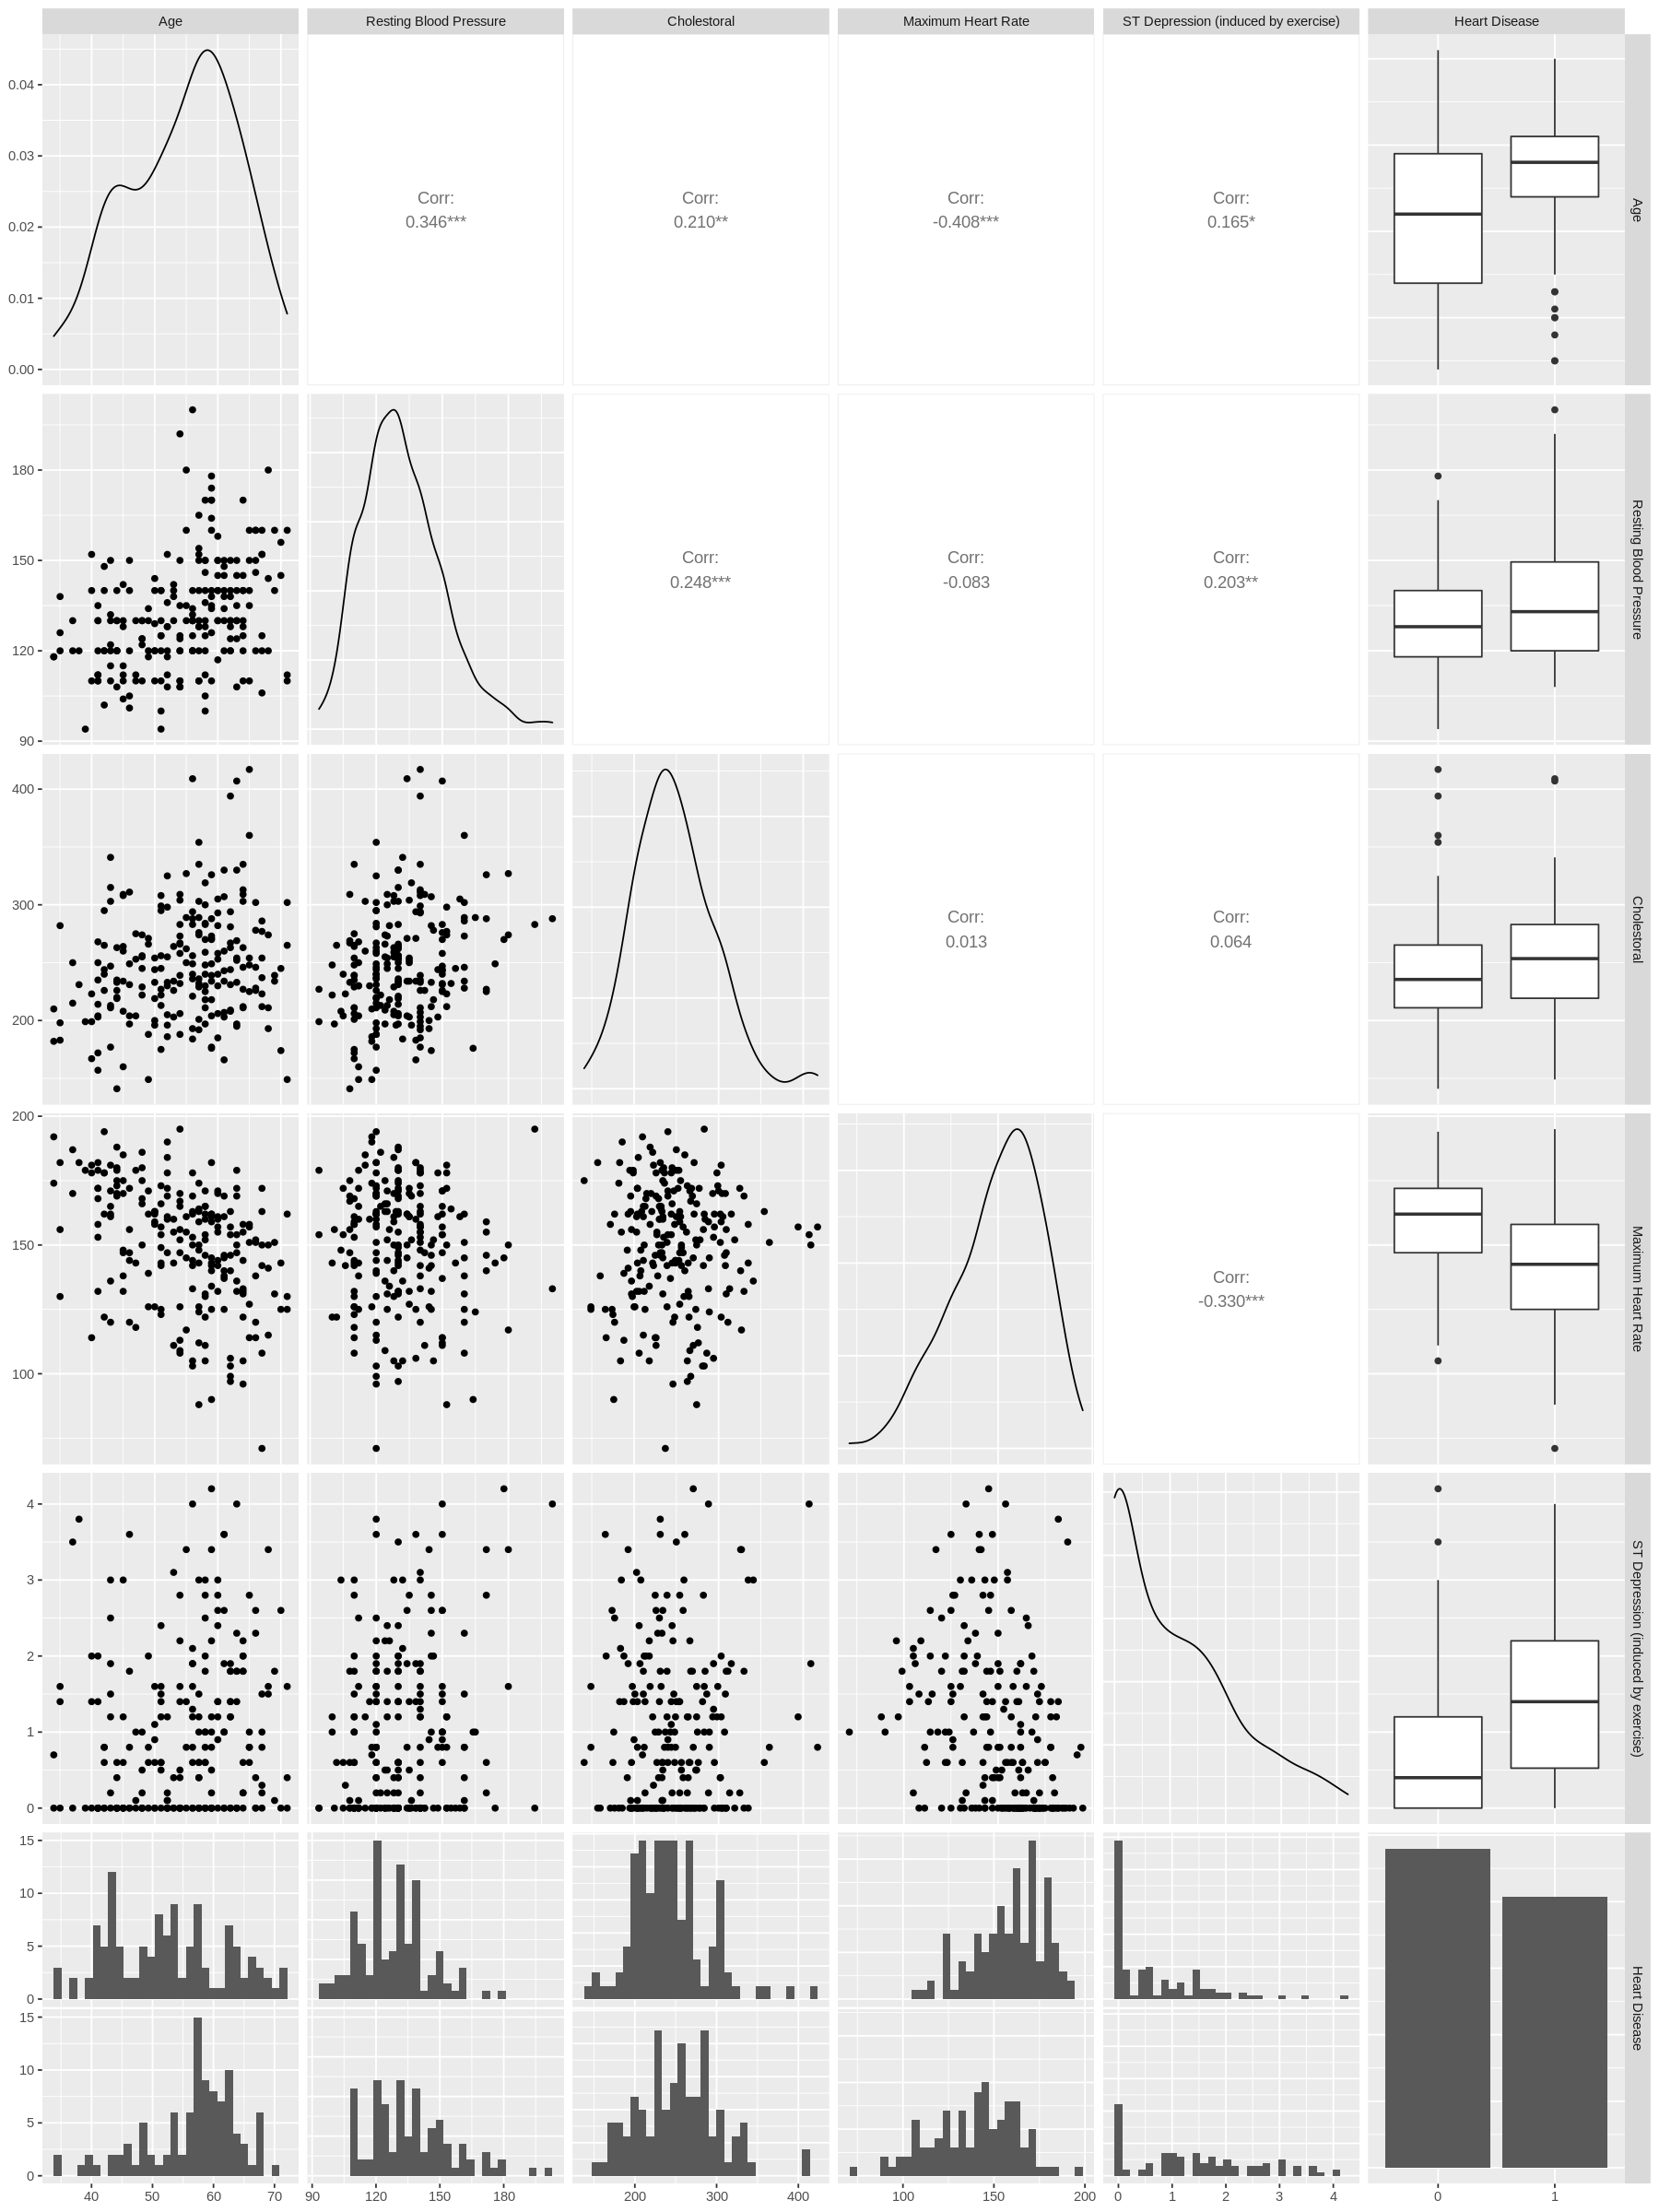

In [26]:
options(repr.plot.width = 15, repr.plot.height = 20) 
heart_ggpair <- heart_train |>
    ggpairs(columns = c("age", "trestbps", "chol", "thalach", "oldpeak", "heart_disease"), columnLabels = c("Age", "Resting Blood Pressure", "Cholestoral", "Maximum Heart Rate", "ST Depression (induced by exercise)", "Heart Disease"))

heart_ggpair

#todo: jade - solve binwidth warning

**Visualizing the distribution of heart disease**

Using the predictor variables, we are going to visualize the distribution of heart disease between males and females dependent on the predictor variables we are considering. 

Here we visualize the variable, fasting blood rate (fps) and whether it impacts the likelihood of having heart disease for both males and females.

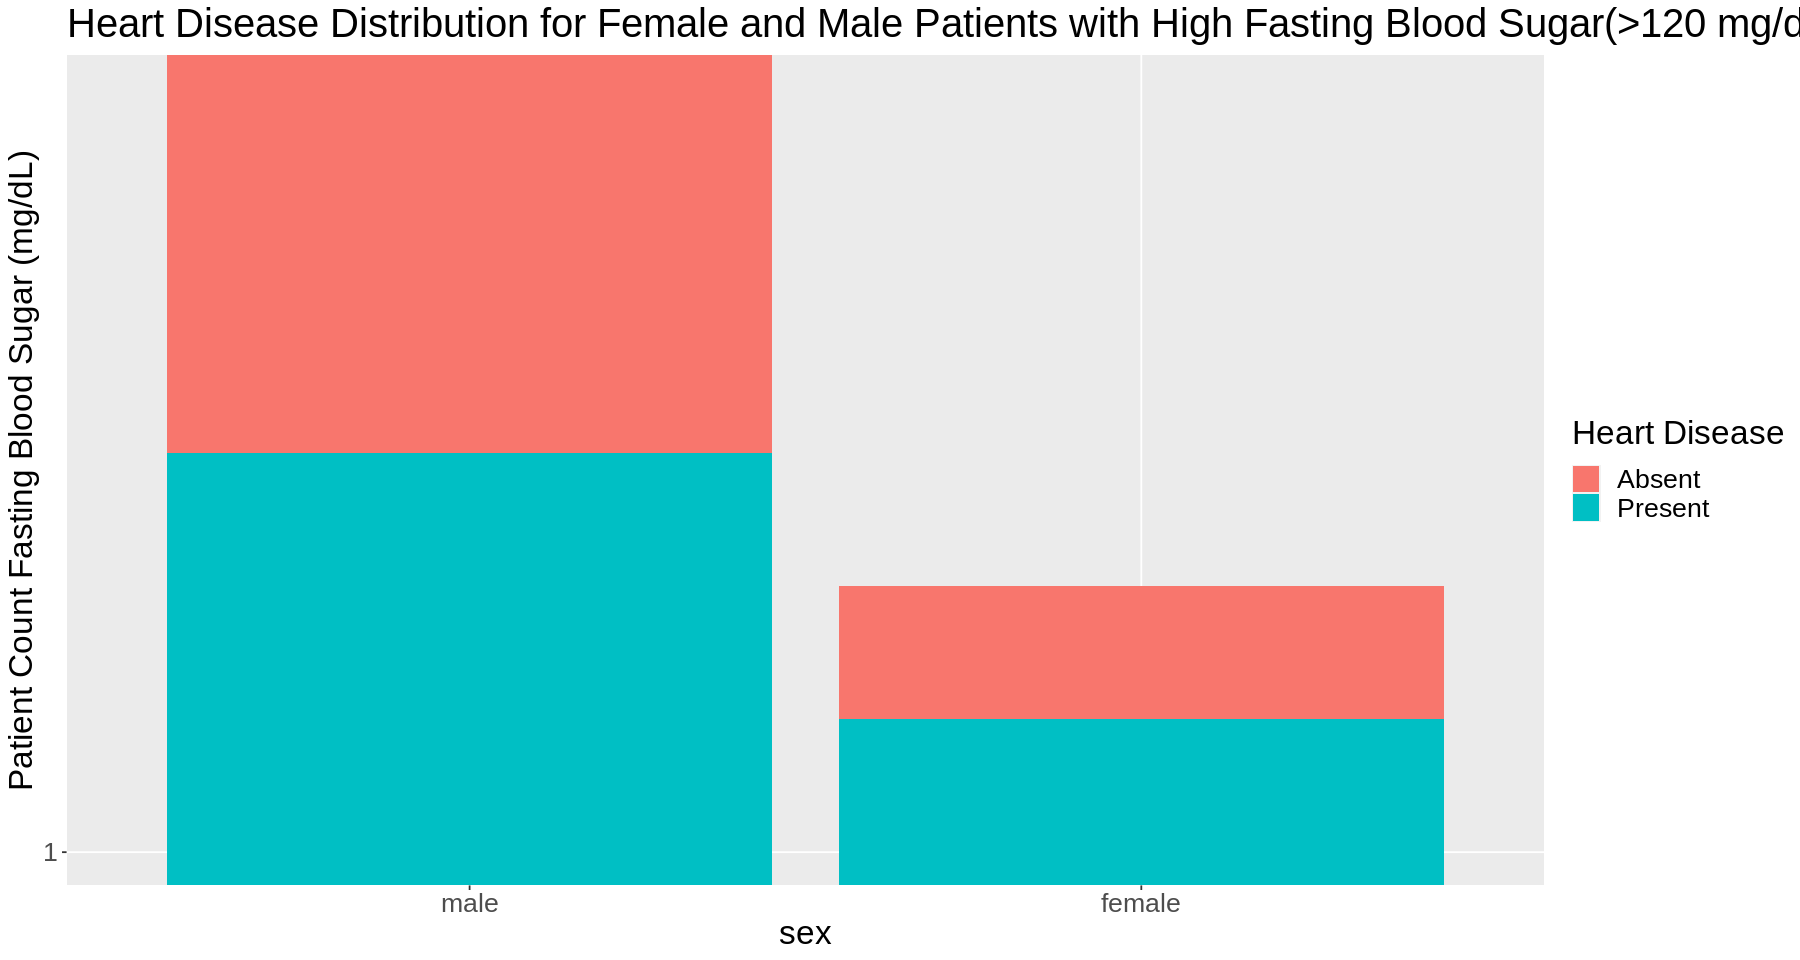

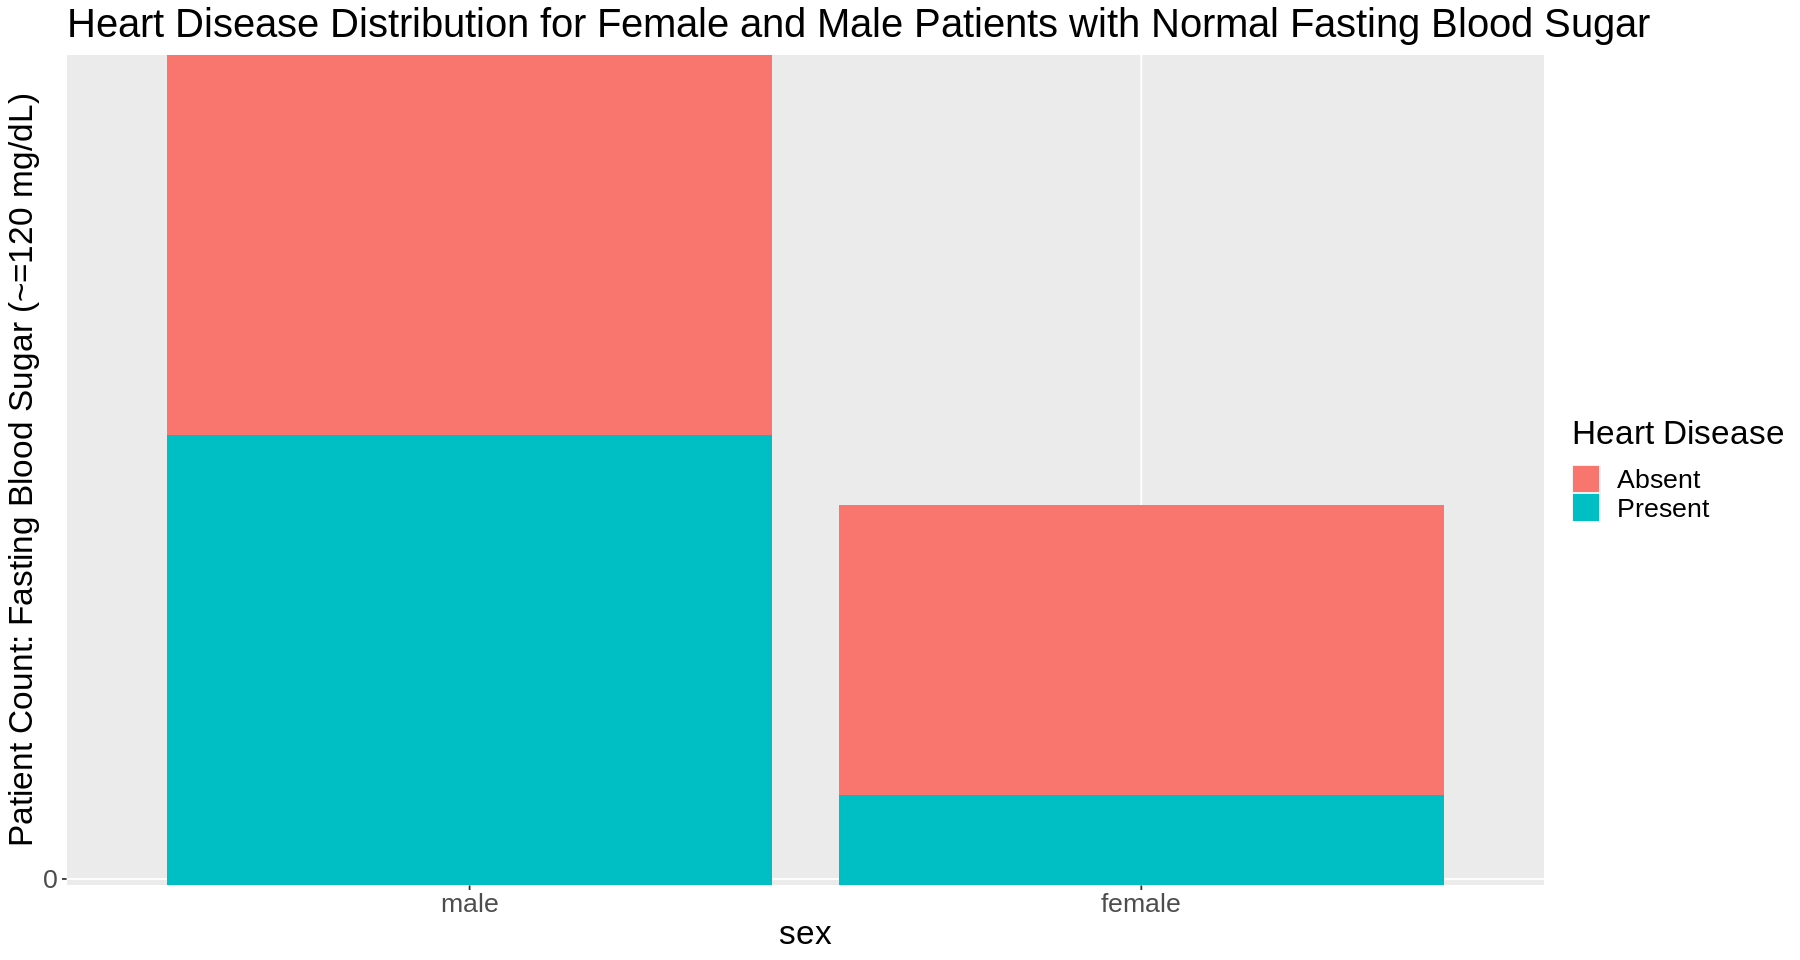

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8) 
sex_vs_fbs_true  <- heart_train |>
    filter(fbs == 1) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count Fasting Blood Sugar (mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Heart Disease Distribution for Female and Male Patients with High Fasting Blood Sugar(>120 mg/dL)") +
    theme(text = element_text(size = 20))
sex_vs_fbs_true
sex_vs_fbs_false  <- heart_train |>
    filter(fbs == 0) |>
    mutate(fbs = as.factor(fbs)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = fbs, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Patient Count: Fasting Blood Sugar (~=120 mg/dL)", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Heart Disease Distribution for Female and Male Patients with Normal Fasting Blood Sugar") +
    theme(text = element_text(size = 20))
sex_vs_fbs_false

**Analysis:** 
The graph above displays that high blood sugar levels do not increase the presence of heart disease in males but has a significant increase for heat disease presence in females 

Here we visualize the variable, exercise-induced angina (exang) and whether it impacts the likelihood of having heart disease for both males and females.

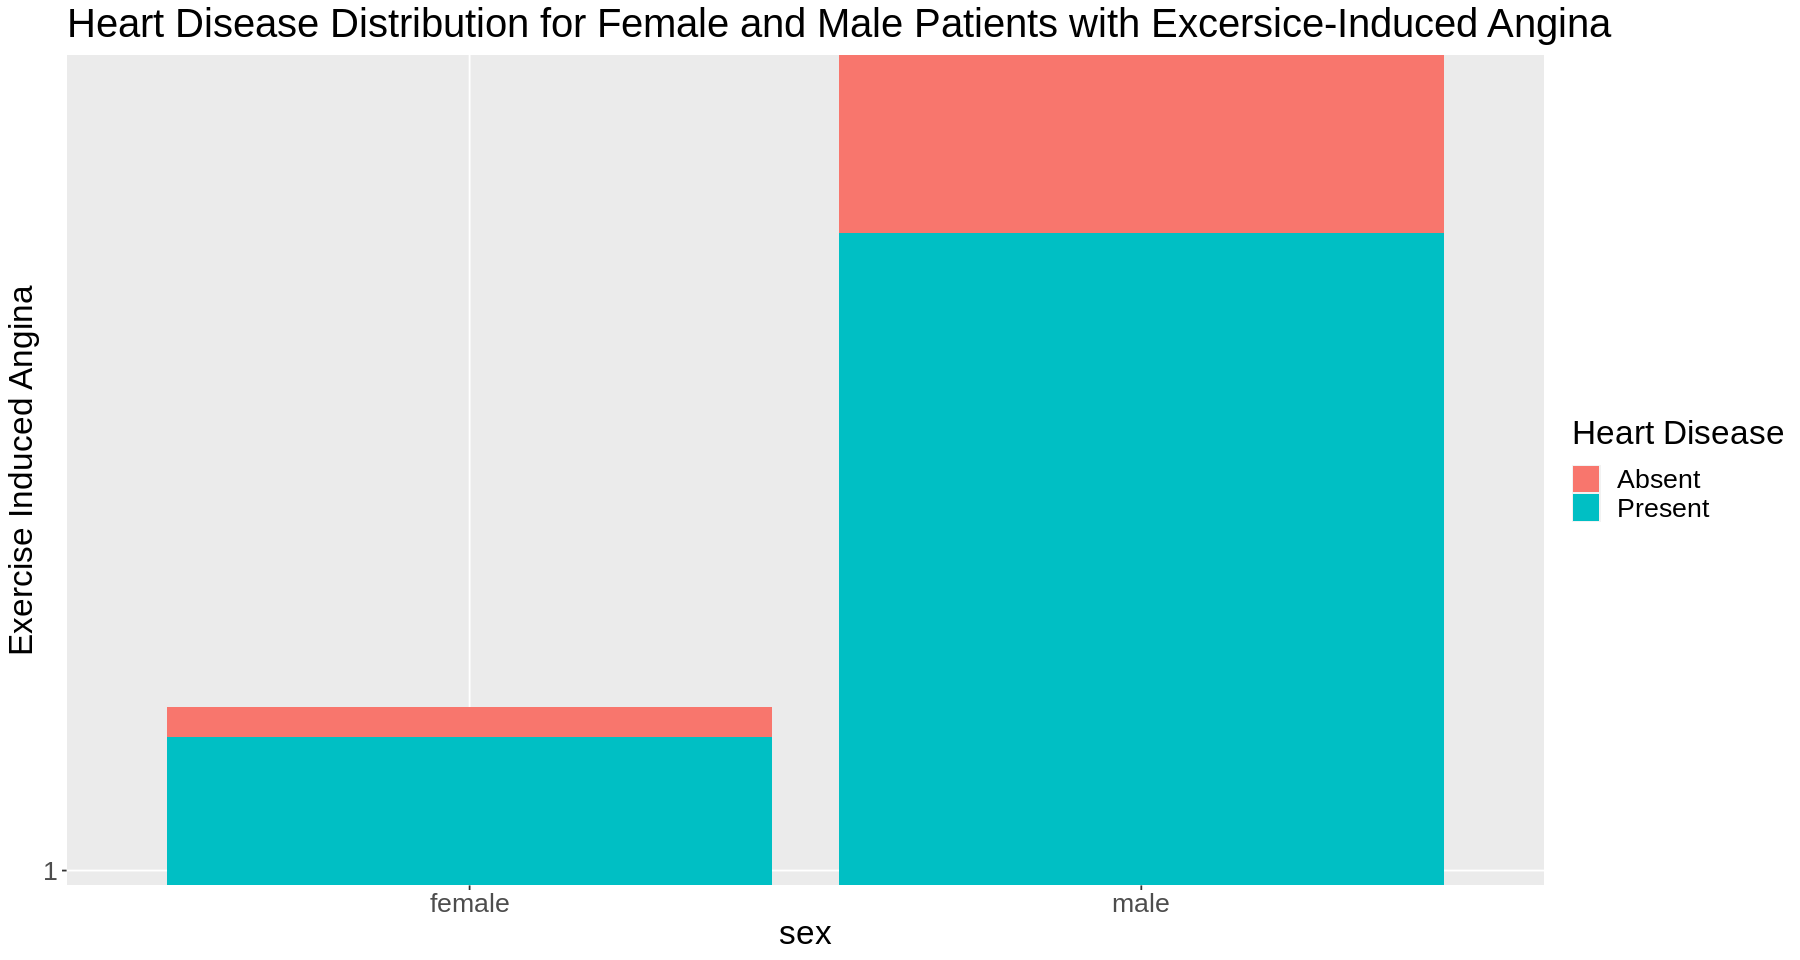

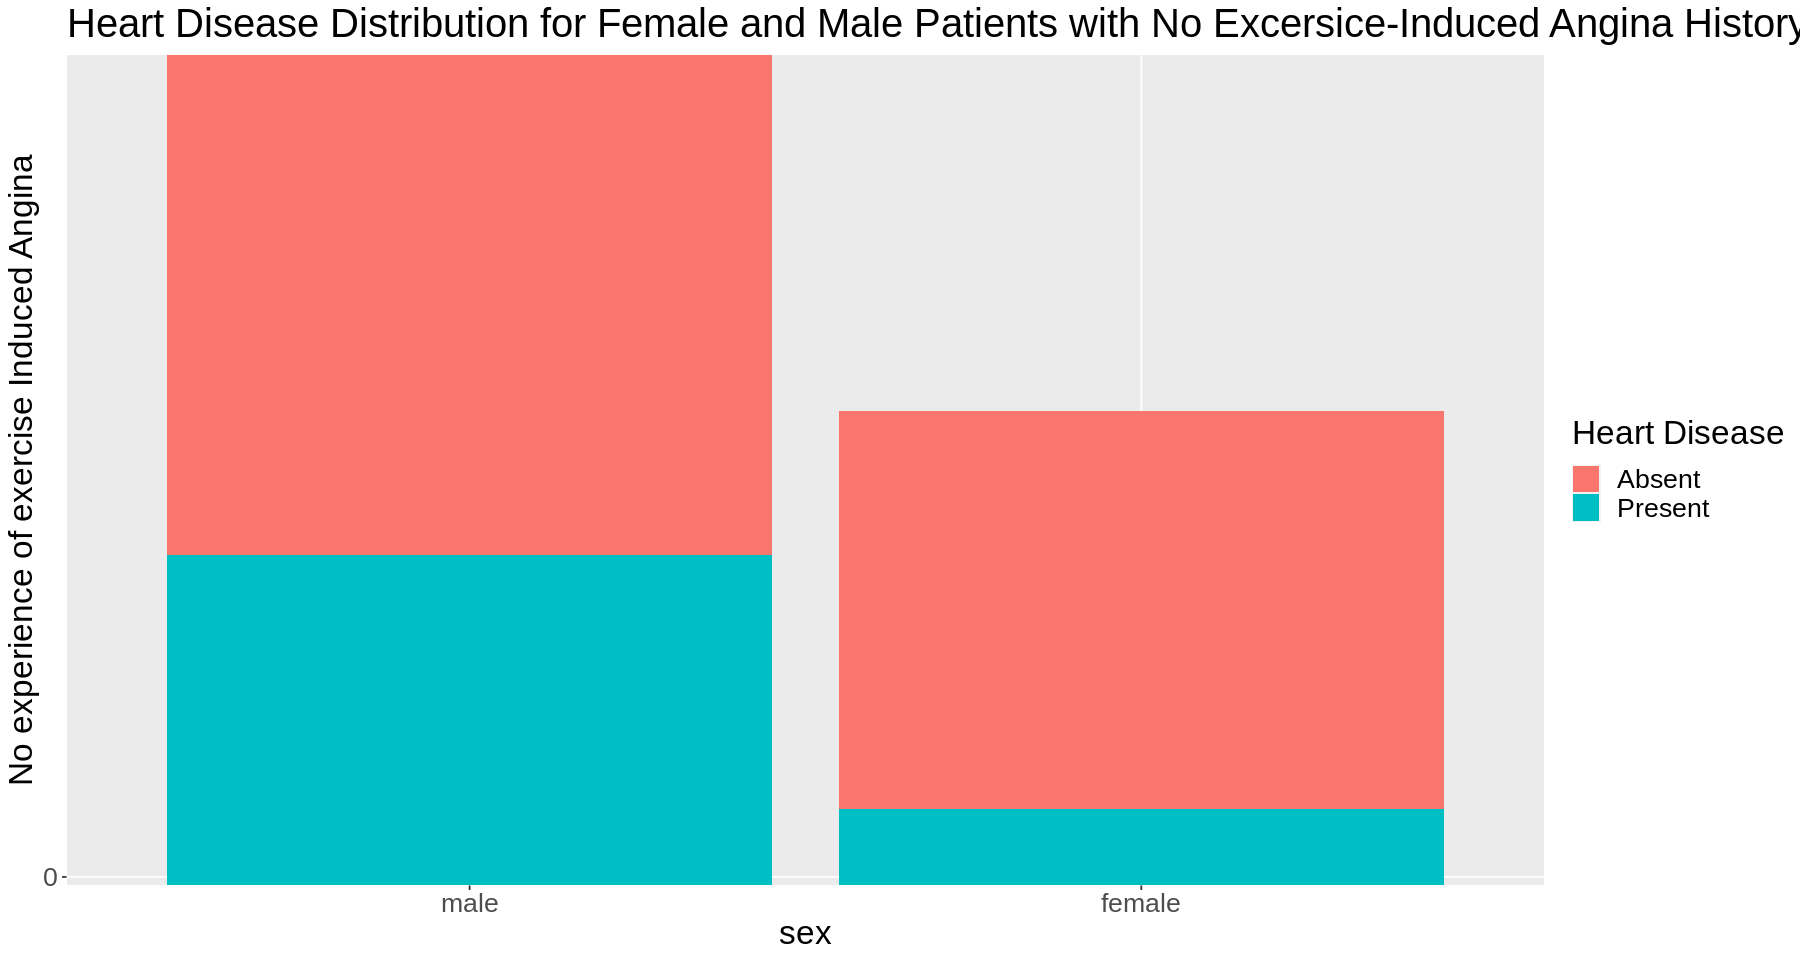

In [30]:
options(repr.plot.width = 15, repr.plot.height = 8) 
sex_vs_exang_true  <- heart_train |>
    filter(exang == 1) |>
    mutate(exang = as.factor(exang)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = exang, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "Exercise Induced Angina", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Heart Disease Distribution for Female and Male Patients with Excersice-Induced Angina") +
    theme(text = element_text(size = 20))
sex_vs_exang_true
sex_vs_exang_false  <- heart_train |>
    filter(exang == 0) |>
    mutate(exang = as.factor(exang)) |>
    mutate(sex = ifelse(sex == 1, "male", "female")) |>
    mutate(sex = as_factor(sex)) |>
    ggplot(aes(x = sex , y = exang, fill = heart_disease)) +
    geom_bar(stat = "identity") +
    labs(x = "sex", y = "No experience of exercise Induced Angina", fill = "Heart Disease") +
    scale_fill_discrete(name = "Heart Disease", labels = c("Absent", "Present")) +
    ggtitle("Heart Disease Distribution for Female and Male Patients with No Excersice-Induced Angina History") +
    theme(text = element_text(size = 20))
sex_vs_exang_false

**Analysis:** 
The graph above displays that the history of exercise-induced angina leads to a higher presence of heart disease in males and a lower absence in females.

## Building a Classification Model

**Forward Selecting**

All the code above are set to raw type because it will take more than five minutes to run it. Here is the result of the forward selection:

<img src= "https://dsci-100-student.stat.ubc.ca/jupyter/user/831515/files/DSCI-100-project/forward_selection.png?_xsrf=2%7C1f2771c4%7C9ee01a59421194fab0130e7579760b93%7C1668464011" width = "500" />



**Creating a recipe**

In [24]:
set.seed(978)

heart_recipe <- recipe(heart_disease ~ age + sex + cp + trestbps + chol + fbs + exang + ca + thal, 
                       data = heart_train) |>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

heart_data_scaled <- heart_recipe |>
                       prep() |>
                       bake(heart_train)

**Creating a tuning model**

In [25]:
set.seed(978)

heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
             set_engine("kknn") |>
             set_mode("classification")

**Performing 5-fold cross validation**

In [29]:
set.seed(978)

heart_vfold <- vfold_cv(heart_train, v = 5, strata = heart_disease)

**Collecting metrics for 10 values of k**

In [30]:
set.seed(978)

heart_results <- workflow() |>
                 add_recipe(heart_recipe) |>
                 add_model(heart_tune) |>
                 tune_grid(resamples = heart_vfold, grid = 10) |>
                 collect_metrics() 

**Filtering out the accuracy**

In [31]:
accuracies <- heart_results |> 
      filter(.metric == "accuracy")

**Accuracy vs k graph**

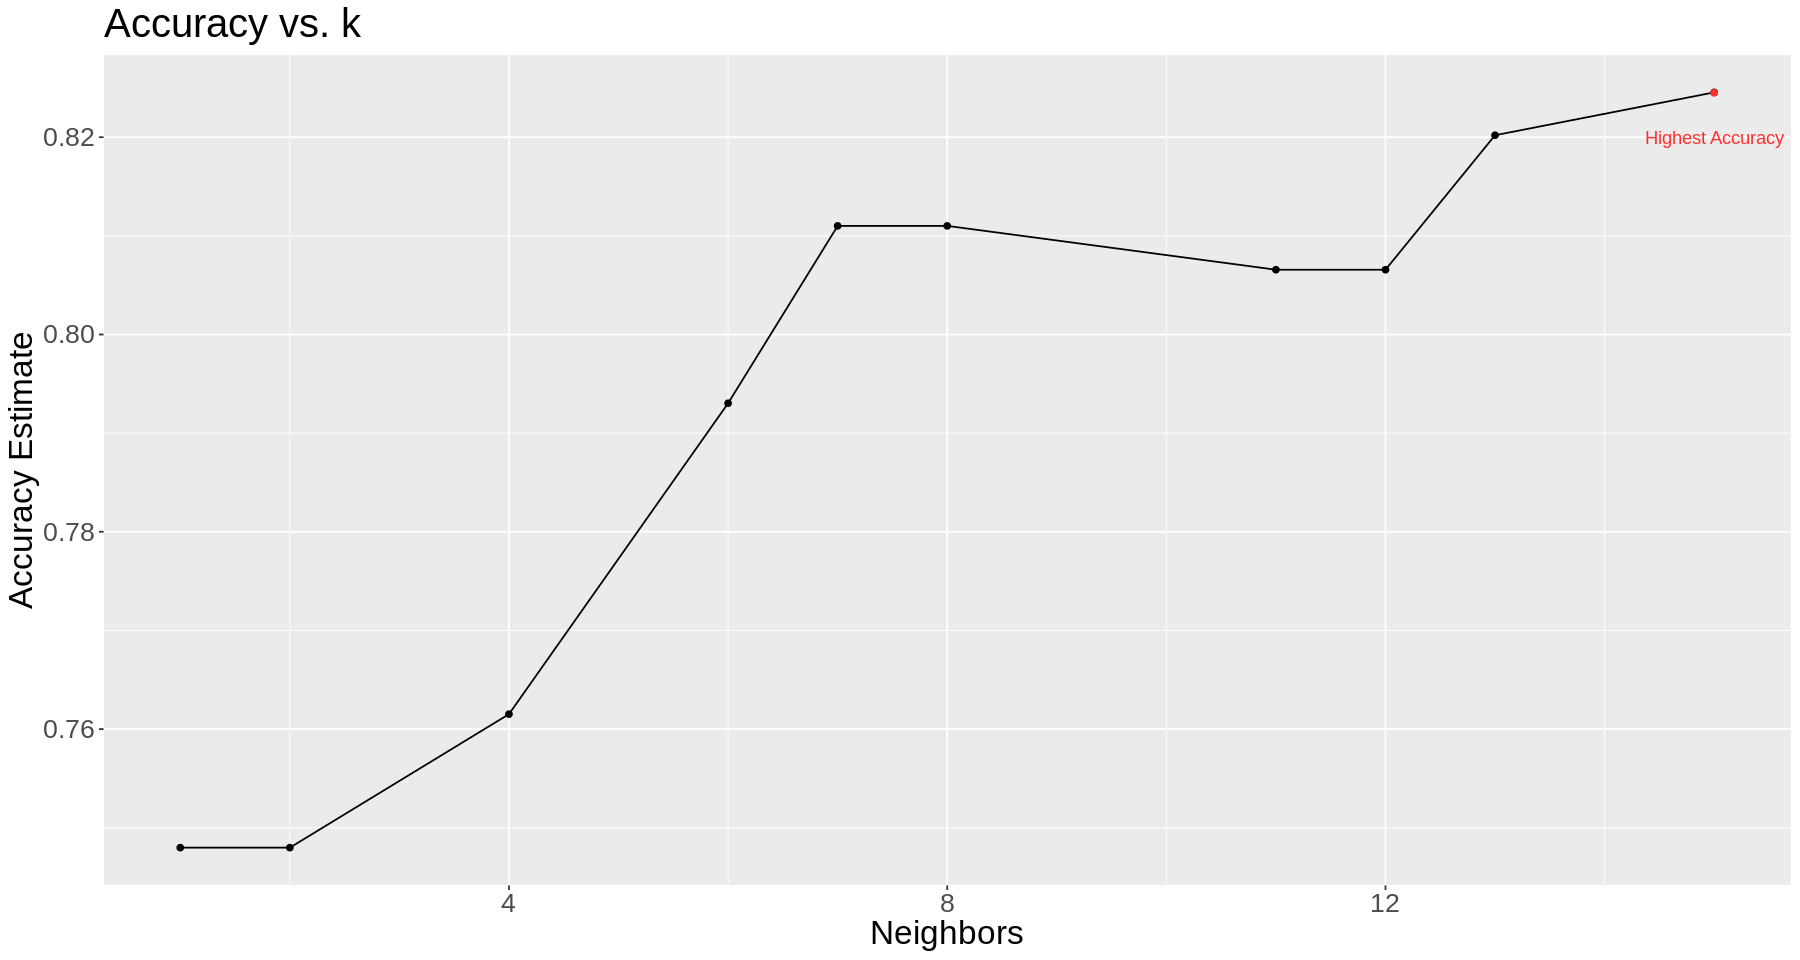

In [52]:
options(repr.plot.width = 15, repr.plot.height = 8)

accuracy_versus_k <- accuracies|>
      ggplot(aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      annotate("point", x = 15, y =  0.8245, color = "firebrick1") +
      annotate("text", x = 15, y =  0.82, label = "Highest Accuracy", color = "firebrick1") +
      labs(x = "Neighbors", y = "Accuracy Estimate", title = "Accuracy vs. k") +
      theme(text = element_text(size = 20))

accuracy_versus_k

**Selecting the k with greatest accuracy**

In [33]:
best_k <- accuracies |>
          filter(mean == max(mean)) |>
          pull(neighbors)
best_k

[1] 15

**Creating the optimized model**

In [34]:
set.seed(978)

heart_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
              set_engine("kknn") |>
              set_mode("classification")

**Fitting the model**

In [35]:
set.seed(978)

heart_fit <- workflow() |>
             add_recipe(heart_recipe) |>
             add_model(heart_spec) |>
             fit(data = heart_train)

**Determing RMSPE (root mean squared prediction error) using the test set**

In [36]:
set.seed(978)

heart_predictions <- predict(heart_fit, heart_test) |>
                     bind_cols(heart_test) |>
                     metrics(truth = heart_disease, estimate = .pred_class) |>
                     filter(.metric == "accuracy") |>
                     pull(.estimate)
heart_predictions

[1] 0.8266667

## Discussion

**Summarize what you found**
-...

**Was this what we expected to find?**
-  Our team expected that the model would be able to predict the presence of heart disease to a moderate degree of accuracy, greater than ~60%. The accuracy result of the model aligns quite clearly with our expectations. Because there are many other genetic and environmental factors that affect the presence of heart disease which are not accounted for in our predictor variables, a perfect or nearly perfect accuracy is not possible. 

**Impacts**
- While our model should be able to correctly diagnose heart disease for a majority of new observations, it will not be able to accurately diagnose to the degree that most medical professionals would aim for if the model were to be used in practice. 
- The real reasoning behind this project is to ensure the general public is aware of certain life factors they may have that are making them more susceptible to heart disease. While the model cannot perfectly predict the presence of heart disease, it may serve as a proactive measure that allows people to realize that they are likely to have heart disease, and encourage them to pursue professional diagnosis and treatment.

**Future questions**
- The results of this model could lead to the development of follow-up questions from researchers that are trying to determine which factors are most impactful in causing heart disease. Additionally, examining which particular variations of heart disease are difficult to predict using this model could lead to the investigation of what other external factors not considered in this project are influencingthe risk of heart disease.

## References

1) Abd El-Wahab, E. W. (2020). Predicting coronary heart disease using risk assessment charts and Risk Factor categories. *Journal of Public Health*, 29(5), 1037–1045. https://doi.org/10.1007/s10389-020-01224-z 

    - Talks about cardiovascular disease and testing if WHO heart risk prediction charts are correct based on existing patient history. The study’s goal is to identify those at risk of heart disease using pre-existing health records.
    - Methodology: Conducted a patient survey  and medical examination.  Risk factors questioned in survey were old age, male sex, smoking, lack of physical activity, poor dietary habits, metabolic factors, medical and family history of CHD, hypertension, DM, dyslipidemia, peripheral vascular disease, and strokes.
    - Study created two prediction models. First model was a risk factor multivariate logistic regression model  and the second model ranked the risk from the regression model. 
    - Results: patients were more often males, of older age, and were not as affected by smoking/food.
